# Week 20 Homework

In [301]:
# Dependencies and modules:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus.reader.plaintext import read_blankline_block, concat
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon') <- downloaded, then commented code out

#### 1. Write a python program (not a Jupyter notebook, but a py file you run from the command line) that accepts the cats_txt.txt file as input and counts the frequency of all words and punctuation in that text file, ordered by frequency. Make sure to handle capital and lowercase versions of words and count them together.

In [ ]:
See .py file at: 

#### 2. Document how to run the program you created in question 1 in a readme.md file in your repo. Be as clear as possible. Use proper markdown, and consider using screenshots. Be sure to briefly discuss why this kind of exercise might be helpful for NLP in your markdown. 

See https://github.com/N-J-Miller/Week_20/blob/b3d37e5ff0d9e23c74fe0295c52091688fc43819/README.md

# In a Jupyter notebook:

### 3. Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a histogram. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization. 

There are a few steps I need to take to accomplish my end of a histogram of top 20 most frequently used non-stop words. First, I need to define stop words and then filter my dataset for them. Then I will filter to keep only alphanumeric words (tossing punctuation). Then I will stem or lemmatize to get lists of root words to sort by descending count.

In [138]:
# Define stop words:
sw = set(nltk.corpus.stopwords.words('english'))
# sw <-Looks good but I commented it out to keep it from spamming my notebook.

In [302]:
# load Paradise Lost:
paradise = nltk.corpus.gutenberg.words('milton-paradise.txt')
paradise

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]

In [137]:
# As discussed in class, stop words will never be capitalized.
# Here, I filter my text for stop words and punctuation:

filtered_list = [word for word in paradise if word.lower() not in sw]
filtered_list = [word for word in filtered_list if word.isalnum()]
filtered_list[:20]

['Paradise',
 'Lost',
 'John',
 'Milton',
 '1667',
 'Book',
 'Man',
 'first',
 'disobedience',
 'fruit',
 'forbidden',
 'tree',
 'whose',
 'mortal',
 'taste',
 'Brought',
 'death',
 'World',
 'woe',
 'loss']

Now I want to try stemming and lemmatization and see which performs better on my text.

#### Stemming:

In [89]:
# instantiate the module:
get_stems = SnowballStemmer(language='english')
# apply it to my filtered text:
stemmed_words = [get_stems.stem(word) for word in filtered_list]
# make a pandas object out of the list:
stemmed_words_df = pd.DataFrame(stemmed_words)
stemmed_words_df = stemmed_words_df.value_counts(ascending=False).rename_axis('Word').reset_index(name='Count')
stemmed_words_df = stemmed_words_df.loc[:19]
stemmed_words_df

,Word,Count
0,heaven,485
1,god,316
2,earth,228
3,man,178
4,first,175
5,high,159
6,day,157
7,one,142
8,power,133
9,son,132


Okay, my results for stemming are choked with Early Modern English stop words that are apparently not in the nltk list. I am going to append my sw set with the following: thou, thee, thus, thi, shall, yet, though, and us.(I did find a VERY cool Python module called Classical Languages Toolkit, cltk, that looked to be somebody's thesis project or something, but it was dead and broken. Here is the link, anyway, cuz its cool:http://cltk.org ) 

In [134]:
more_words = ['thou', 'thee', 'thus', 'thy', 'thine', 'hath', 'shall', 'yet', 'ye', 'though', 'us']
sw.update(more_words)
#sw <- Looked good, but commented it out to keep it from spamming my notebook
# Now I'll go back up and re-run the previous cells to generate a new Top 20

#### Lemmatizing:

In [90]:
# instantiate the module:
get_lemmas = WordNetLemmatizer()
# apply it to my filtered text:
lemmed_words = [get_lemmas.lemmatize(word) for word in filtered_list]
# make a pandas object out of the list:
lemmed_words_df = pd.DataFrame(lemmed_words)
lemmed_words_df = lemmed_words_df.value_counts(ascending=False).rename_axis('Word').reset_index(name='Count')
lemmed_words_df = lemmed_words_df.loc[:19]
lemmed_words_df

,Word,Count
0,heaven,436
1,god,316
2,earth,217
3,man,176
4,first,175
5,day,157
6,high,153
7,one,142
8,son,132
9,far,129


Lemmatizing looks more reasonable, but I'm afraid upper/lowercase might be an issue since lemmatizer does not force lower like stemmer. I will force lower and run both stem/lemmatizer again to be sure:

In [129]:
for word in range(len(filtered_list)):
    filtered_list[word] = filtered_list[word].lower()

filtered_list[:20]

['paradise',
 'lost',
 'john',
 'milton',
 '1667',
 'book',
 'man',
 'first',
 'disobedience',
 'fruit',
 'forbidden',
 'tree',
 'whose',
 'mortal',
 'taste',
 'brought',
 'death',
 'world',
 'woe',
 'loss']

In [98]:
top_20_comparison = pd.merge(stemmed_words_df, lemmed_words_df, on='Word', how="outer")
top_20_comparison = top_20_comparison.rename(columns={"Count_x": "Stem Count", "Count_y": "Lem Count"})
top_20_comparison

,Word,Stem Count,Lem Count
0,heaven,485.0,436.0
1,god,316.0,316.0
2,earth,228.0,217.0
3,man,178.0,176.0
4,first,175.0,175.0
5,high,159.0,153.0
6,day,157.0,157.0
7,one,142.0,142.0
8,power,133.0,125.0
9,son,132.0,132.0


#### The methods produced comparable results, but stemming seems more reasonable for this text because the lemmatizing counts are generally lower where they aren't the same which tells me it is probably not grabbing words like "heaven-ly" or "good-ly", which I want to count as their stems heaven and good, for example. It's easy to plot two histograms in one plot, tho, so I'll go ahead and throw them both in to be visualized. 

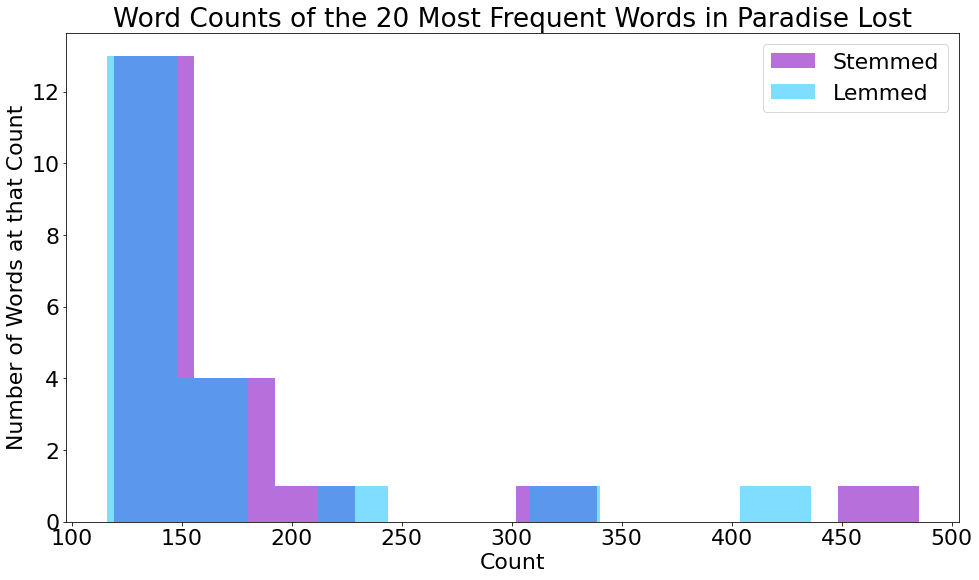

In [147]:

x = stemmed_words_df['Count']
y = lemmed_words_df['Count']

plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 22})
plt.hist(x, histtype='bar', color='darkorchid', label='Stemmed', stacked=True, alpha=0.7)
plt.hist(y, histtype='bar', color='deepskyblue', label='Lemmed', stacked=True, alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Count')
plt.ylabel('Number of Words at that Count')
plt.title('Word Counts of the 20 Most Frequent Words in Paradise Lost')
plt.show()

### 4. Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run. 

*you can pick another book in the Gutenberg Corpus if you’re feeling adventurous or curious. 

I did some research on tokenizing and apparently when you use nltk...sents()  but then have to join your tokenized words back together AND deal with  whitespaces around punctuation, this becomes more computationally expensive  than using the PlaintextCorpusReader module WITHOUT tokenizing each sentence  with .sent. So here I will directly read from corpus fileid into a block of sentences.

In [ ]:
# Define the corpus:
gutenberg = nltk.corpus.gutenberg

# Creating a function I can use repeatedly to test different fileids I might
# want to try:
def sentences(corpus, fileids = None):
    # This will read a stream of txt as one sentence and remove the line breaks.
    def read_sentence_block(stream):
        sents = []
        for para in corpus._para_block_reader(stream):
            sents.extend([s.replace('\n', ' ') for s in corpus._sent_tokenizer.tokenize(para)])
        return sents

    return concat([corpus.CorpusView(path, read_sentence_block, encoding=enc)
                   for (path, enc, fileid)
                   in corpus.abspaths(fileids, True, True)])

In [166]:
sense_sents = sentences(gutenberg, fileids = 'austen-sense.txt')
[print(x) for x in sense_sents]

[Sense and Sensibility by Jane Austen 1811]
CHAPTER 1
The family of Dashwood had long been settled in Sussex.
Their estate was large, and their residence was at Norland Park, in the centre of their property, where, for many generations, they had lived in so respectable a manner as to engage the general good opinion of their surrounding acquaintance.
The late owner of this estate was a single man, who lived to a very advanced age, and who for many years of his life, had a constant companion and housekeeper in his sister.
But her death, which happened ten years before his own, produced a great alteration in his home; for to supply her loss, he invited and received into his house the family of his nephew Mr. Henry Dashwood, the legal inheritor of the Norland estate, and the person to whom he intended to bequeath it.
In the society of his nephew and niece, and their children, the old Gentleman's days were comfortably spent.
His attachment to them all increased.
The constant attention of Mr

Sir John had been very urgent with them all to spend the next day at the park.
Mrs. Dashwood, who did not chuse to dine with them oftener than they dined at the cottage, absolutely refused on her own account; her daughters might do as they pleased.
But they had no curiosity to see how Mr. and Mrs. Palmer ate their dinner, and no expectation of pleasure from them in any other way.
They attempted, therefore, likewise, to excuse themselves; the weather was uncertain, and not likely to be good.
But Sir John would not be satisfied--the carriage should be sent for them and they must come.
Lady Middleton too, though she did not press their mother, pressed them.
Mrs. Jennings and Mrs. Palmer joined their entreaties, all seemed equally anxious to avoid a family party; and the young ladies were obliged to yield.
"Why should they ask us?"
said Marianne, as soon as they were gone.
"The rent of this cottage is said to be low; but we have it on very hard terms, if we are to dine at the park whenever

To my fancy, a thousand times prettier than Barton Park, where they are forced to send three miles for their meat, and have not a neighbour nearer than your mother.
Well, I shall spirit up the Colonel as soon as I can.
One shoulder of mutton, you know, drives another down.
If we CAN but put Willoughby out of her head!"
"Ay, if we can do THAT, Ma'am," said Elinor, "we shall do very well with or without Colonel Brandon."
And then rising, she went away to join Marianne, whom she found, as she expected, in her own room, leaning, in silent misery, over the small remains of a fire, which, till Elinor's entrance, had been her only light.
"You had better leave me," was all the notice that her sister received from her.
"I will leave you," said Elinor, "if you will go to bed."
But this, from the momentary perverseness of impatient suffering, she at first refused to do.
Her sister's earnest, though gentle persuasion, however, soon softened her to compliance, and Elinor saw her lay her aching head

Marianne was in every respect materially better, and he declared her entirely out of danger.
Mrs. Jennings, perhaps satisfied with the partial justification of her forebodings which had been found in their late alarm, allowed herself to trust in his judgment, and admitted, with unfeigned joy, and soon with unequivocal cheerfulness, the probability of an entire recovery.
Elinor could not be cheerful.
Her joy was of a different kind, and led to any thing rather than to gaiety.
Marianne restored to life, health, friends, and to her doting mother, was an idea to fill her heart with sensations of exquisite comfort, and expand it in fervent gratitude;-- but it lead to no outward demonstrations of joy, no words, no smiles.
All within Elinor's breast was satisfaction, silent and strong.
She continued by the side of her sister, with little intermission the whole afternoon, calming every fear, satisfying every inquiry of her enfeebled spirits, supplying every succour, and watching almost every l

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

## Analyse the Sense Sentence Sentiments!!! 
hahaha XD

In [296]:
# instantiate my module:
analyzer = SentimentIntensityAnalyzer()

# instantiate an empty list:
sentiments = []

# loop thru my sentences:
for sent in sense_sents:
    sentiment = analyzer.polarity_scores(sent)
    compound = sentiment["compound"]
    pos = sentiment['pos']
    neu = sentiment['neu']
    neg = sentiment['neg']

    sentiments.append({
                "Sentence":sent,
                "Compound":compound,
                "+ Score":pos,
                "- Score":neg,
                "= Score":neu})

sentiments_df = pd.DataFrame(sentiments)
# Removing title, headings, and duplicates:
sentiments_df.drop([0,1,4998], inplace=True)
sentiments_df.drop_duplicates(inplace=True)
sentiments_df

,Sentence,Compound,+ Score,- Score,= Score
2,The family of Dashwood had long been settled i...,0.0000,0.000,0.000,1.000
3,"Their estate was large, and their residence wa...",0.8419,0.201,0.000,0.799
4,The late owner of this estate was a single man...,0.3167,0.071,0.000,0.929
5,"But her death, which happened ten years before...",-0.2263,0.114,0.128,0.757
6,"In the society of his nephew and niece, and th...",0.4215,0.141,0.000,0.859
...,...,...,...,...,...
4993,"He lived to exert, and frequently to enjoy him...",0.4939,0.286,0.000,0.714
4994,"His wife was not always out of humour, nor his...",0.4019,0.154,0.113,0.733
4995,"For Marianne, however--in spite of his incivil...",0.7845,0.207,0.086,0.707
4996,Mrs. Dashwood was prudent enough to remain at ...,0.6369,0.102,0.000,0.898


In [295]:
# Sprucing data for results display:

pos = sentiments_df.sort_values('+ Score',ascending=False)[['Sentence','+ Score']].head()
neg = sentiments_df.sort_values('- Score',ascending=False)[['Sentence','- Score']].head()
neu = sentiments_df.sort_values('= Score',ascending=False)[['Sentence','= Score']].head()
pos['Sentiment'] = 'Positive'
pos = pos.rename(columns = {"+ Score":"Score"})
neg['Sentiment'] = 'Negative'
neg = neg.rename(columns = {"- Score":"Score"})
neu['Sentiment'] = 'Neutral'
neu = neu.rename(columns = {"= Score":"Score"})
sense_sent_sentiments = pd.concat([pos, neu, neg])

### Display Results!

Text(0.5, 1.03, 'Sense and Sentimentality')

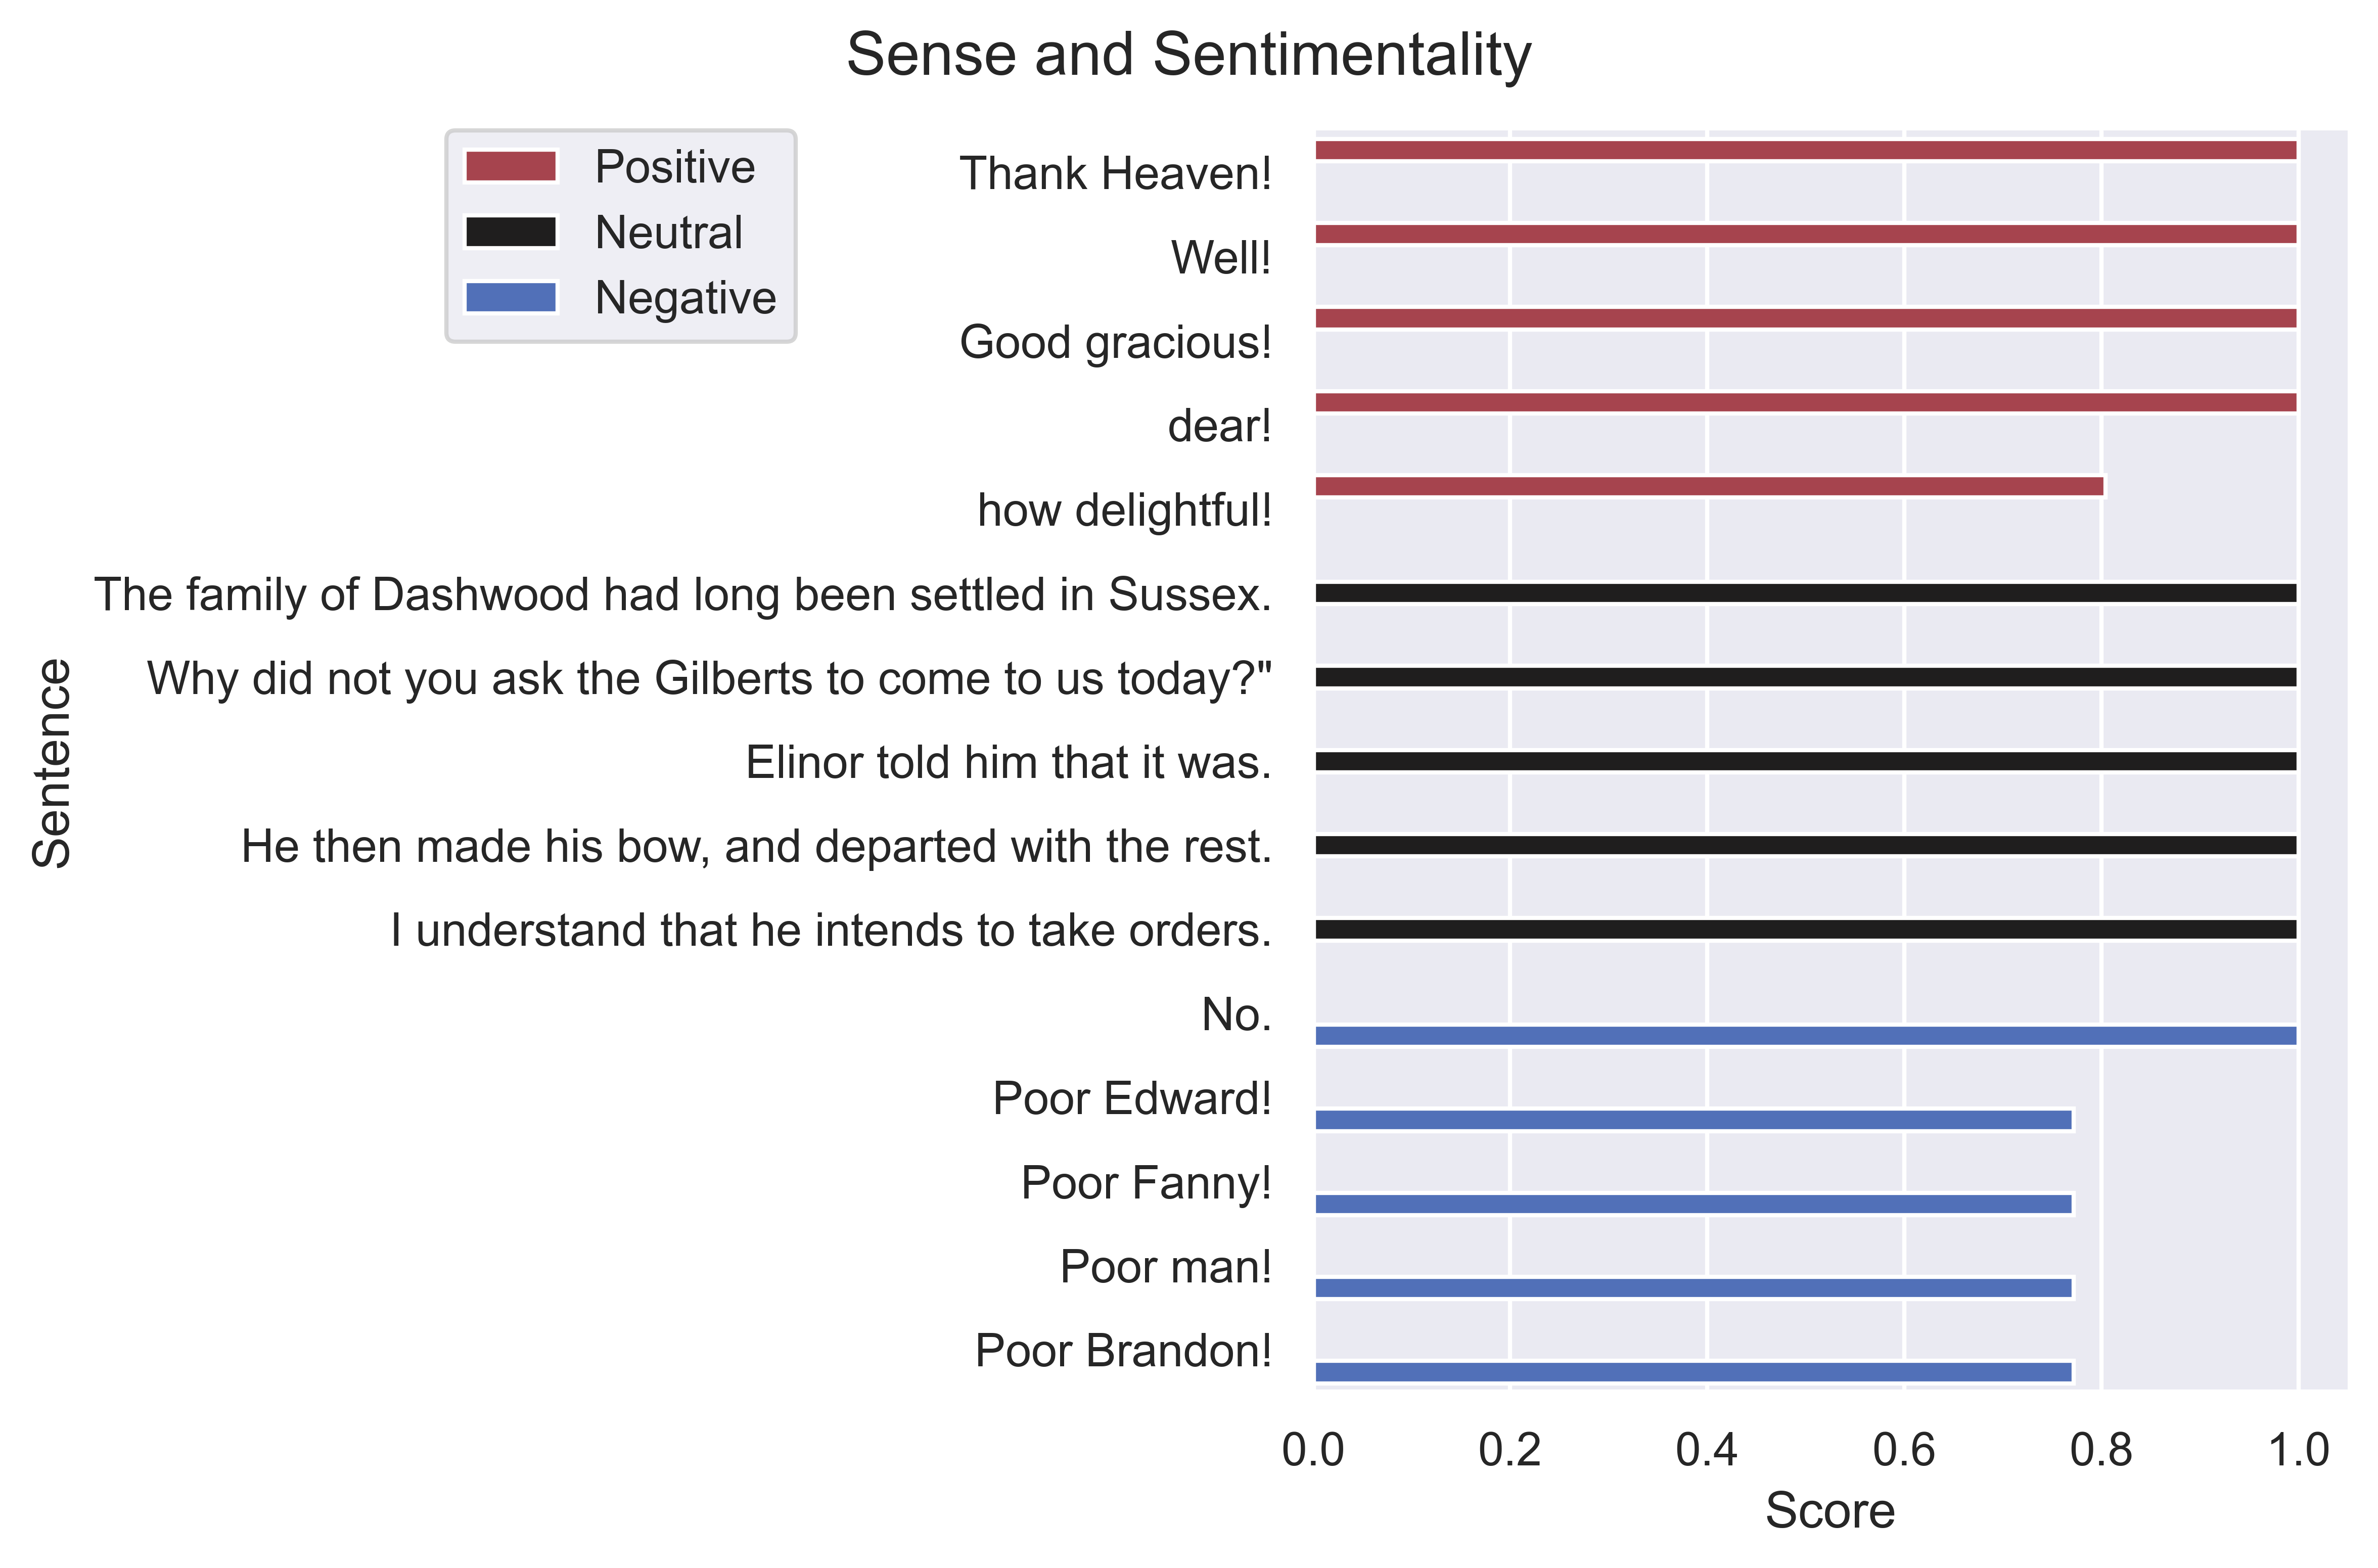

In [299]:
sns.set(rc={"figure.dpi":600})
g = sns.catplot(x = "Score", y = "Sentence", data=sense_sent_sentiments, hue="Sentiment",hue_order=["Positive","Neutral", "Negative"], legend_out=False, kind= "bar", palette='icefire_r', sharex=True, height=5, aspect=1.6)
plt.legend(bbox_to_anchor=(-0.50, 1), loc='upper right', borderaxespad=0)
g.fig.suptitle("Sense and Sentimentality", y=1.03)

### 5. Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not. 

The sentences turned out great thanks to streaming the entire text block with PlaintextCorpusReader. This must have contributed to good sentiment analysis because the scores were as expected given the lexicon definitions. The most intuitive proof? "No." = 100% negative sentiment. Thanks, Vader. XD